<div style="text-align: center;">
    <img src="banners/catRecognition.jpg" style="width:1920px;height:500px;">
</div>

# 🐱 Cat Recognition Project
This project involves building a neural network to recognize cats in images. The notebook guides you through data preparation, model building, training, and evaluation processes.


<div style="text-align: center;">
    <img src="banners/import.jpg" style="width:600px;height:350px;">
</div>

## 📚 1 - Importing Libraries
First, import all the packages you'll need during this assignment. 

- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.

In [100]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward
import scipy
from PIL import Image
from scipy import ndimage
import time
import copy

<div style="text-align: center;">
    <img src="banners/utilityFunc.jpg" style="width:600px;height:350px;">
</div>

## ⚙️ 2 - Utility Functions
- Provides essential functions for the neural network operations.
- Includes both forward and backward propagation functions for sigmoid and ReLU activations.

In [101]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache


def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ


def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

<div style="text-align: center;">
    <img src="banners/init.jpg" style="width:600px;height:350px;">
</div>

## 🏗️ 3 - Initialization
### 🔗 3.1 - 2-layer Neural Network
The following function initializes the parameters for a simple two-layer neural network. This model includes an input layer, a hidden layer, and an output layer.

In [102]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters     



### 3.2 - L-layer Neural Network
The following function generalizes the parameter initialization process for a deep neural network with 
𝐿
L layers. This allows for flexibility in building neural networks with more than two layers.

In [103]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
        layer_dims -- python array (list) containing the dimensions of each layer in our network
    Returns:
        parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
        Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
        bl -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

<div style="text-align: center;">
    <img src="banners/forward.jpg" style="width:600px;height:350px;">
</div>

## 🔄 4 - Forward Propagation Module

<a name='4-1'></a>
### ⏩ 4.1 - Linear Forward 

Now that we have initialized our parameters, we can do the forward propagation module. Start by implementing some basic functions that we can use again later when implementing the model. Now, we'll complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

<a name='ex-3'></a>


In [104]:
def linear_forward(A, W, b):

    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache

<a name='4-2'></a>
### ⏩ 4.2 - Linear-Activation Forward

In this notebook, We will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We've been provided with the `sigmoid` function which returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We've been provided with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what you'll feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

In [105]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    else:
        print("\033[91mError! Please make sure you have passed the value correctly in the \"activation\" parameter")
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

### ⏩ 4.3 - L-Layer Model 

For even *more* convenience when implementing the $L$-layer Neural Net, we will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

In [106]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2 # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

<div style="text-align: center;">
    <img src="banners/cost.jpg" style="width:600px;height:350px;">
</div>

## 📉 5 - Cost Function

Now we can implement forward and backward propagation! We need to compute the cost, in order to check whether our model is actually learning.

In [107]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

<div style="text-align: center;">
    <img src="banners/backward.jpg" style="width:600px;height:350px;">
</div>

## 🔄 6 - Backward Propagation Module

Just as we did for the forward propagation, We'll implement helper functions for backpropagation. Remember that backpropagation is used to calculate the gradient of the loss function with respect to the parameters. 

<a name='6-1'></a>
### ⏮️ 6.1 - Linear Backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose we have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. We want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas we need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


$A^{[l-1] T}$ is the transpose of $A^{[l-1]}$. 

In [108]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

<a name='6-2'></a>
### ⏮️ 6.2 - Linear-Activation Backward

Next, We will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

To help us implement `linear_activation_backward`, two backward functions have been provided:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. We can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. We can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}). \tag{11}$$  

<a name='ex-8'></a>

In [109]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    else:
        print("\033[91mError! Please make sure you have passed the value correctly in the \"activation\" parameter")
    
    return dA_prev, dW, db

<a name='6-3'></a>
### ⏮️ 6.3 - L-Model Backward 

Now we will implement the backward function for the whole network! 

Recall that when we implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, we'll use those variables to compute the gradients. Therefore, in the `L_model_backward` function, we'll iterate through all the hidden layers backward, starting from layer $L$. On each step, we will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass. 

**Initializing backpropagation**:

To backpropagate through this network, we know that the output is: 
$A^{[L]} = \sigma(Z^{[L]})$. Our code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which, again, we don't need in-depth knowledge of!):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

we can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, we can now feed in `dAL` into the LINEAR->SIGMOID backward function we implemented (which will use the cached values stored by the L_model_forward function). 

After that, we will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. We should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

<a name='ex-9'></a>

In [110]:
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

<a name='6-4'></a>
### 🔄 6.4 - Update Parameters

In this section, We'll update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. 

After computing the updated parameters, we store them in the parameters dictionary. 

In [111]:
def update_parameters(parameters, grads, learning_rate):

    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

<div style="text-align: center;">
    <img src="banners/training.jpg" style="width:600px;height:350px;">
</div>

## 🏋️ 7 - Train The Model

<a name='2'></a>
### 📦 7.1 - Load and Process the Dataset

**Problem Statement**: We are given a dataset ("data.h5") containing:

    - a training set of `m_train` images labelled as cat (1) or non-cat (0)
    - a test set of `m_test` images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [112]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [121]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


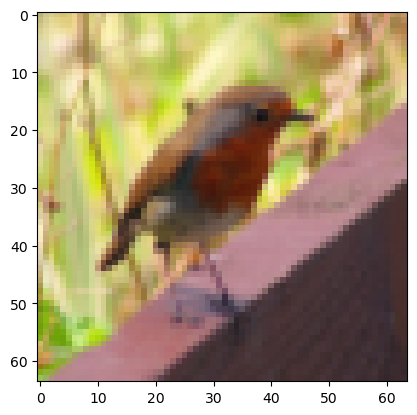

In [122]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [123]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [124]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


### 🧠 7.2 - L-layer Neural Network
Use the helper functions we implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [117]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [118]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):


    np.random.seed(1)
    costs = []                         # keep track of cost
    
  
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
 
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

<a name='5-1'></a>
### 🚀 7.3 - Train the model 

Run the cell below to train our model as a 4-layer neural network. 

- The cost should decrease on every iteration. 

- It may take up to 5 minutes to run 2500 iterations.

In [119]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.7717493284237688
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575223
Cost after iteration 300: 0.6115068816101359
Cost after iteration 400: 0.5670473268366109
Cost after iteration 500: 0.5401376634547794
Cost after iteration 600: 0.5279299569455262
Cost after iteration 700: 0.46547737717668486
Cost after iteration 800: 0.3691258524959283
Cost after iteration 900: 0.3917469743480533
Cost after iteration 1000: 0.31518698886006175
Cost after iteration 1100: 0.27269984417893894
Cost after iteration 1200: 0.23741853400268131
Cost after iteration 1300: 0.1996012053220865
Cost after iteration 1400: 0.18926300388463344
Cost after iteration 1500: 0.16118854665827717
Cost after iteration 1600: 0.1482138966236332
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.12974017549190128
Cost after iteration 1900: 0.12122535068005211
Cost after iteration 2000: 0.11382060668633691
Cost after iteration 2100: 0.1078392

<div style="text-align: center;">
    <img src="banners/prediction.jpg" style="width:600px;height:350px;">
</div>

## 🧩 8 - Prediction
Once the model is trained, we can use it to make predictions on new data. The prediction function will use the learned parameters to predict whether an image contains a cat or not.

### 🔮 8.1 - Predict Function

The `predict` function takes the input data \(X\) and the trained parameters, and outputs the predicted labels. The steps involved in the prediction process are:

1. Perform a forward pass through the network using the learned parameters to compute the activations.
2. Convert the activations into binary predictions (0 or 1) based on a threshold (commonly 0.5).

The `predict` function is implemented as follows:

In [120]:
def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
  
    probas, caches = L_model_forward(X, parameters)


    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

### 📊 8.2 - Evaluate Model Performance

To evaluate the performance of our model, we can calculate the accuracy by comparing the predictions to the true labels
Run the following cell to evaluate the accuracy of the model on the training and test sets:

In [132]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [126]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


By running this evaluation, you can assess how well your model performs on both the training and test datasets, providing insight into its ability to generalize to new data.

Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


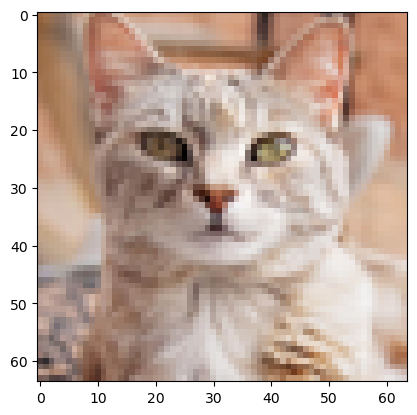

In [127]:
my_image = "image1.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)


print ("y = " + str(np.squeeze(my_predicted_image)) + ", Our L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")